<a href="https://colab.research.google.com/github/DoHyung08/RL/blob/main/0511MLP/MLP%2C_MNIST_%EC%88%AB%EC%9E%90%ED%8C%90%EB%B3%84_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망 구조 이해하기

In [77]:
import torch#pytorch 기반
import torch.nn as nn
import torch.nn.functional as F

# Write neural network code
class NeuralNetwork(nn.Module):#!!!!! 상속받기

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(1,16)#!!!!! 레이어 선언
        self.activation = nn.ReLU()#!! 활성화함수 꼭 포함
        self.hidden_layer = nn.Linear(16,16)#!!!!! 레이어 선언
        self.activation = nn.ReLU()#!! 활성화함수 꼭 포함
        self.output_layer = nn.Linear(16,1)#1 -> 16 -> 1

    def forward(self, x):#!!!!! forward 선언
        x = self.input_layer(x)
        x = self.activation(x)#활성화함수(비선형함수)가 없으면 층을 쌓는게 무의미해짐(일차함수가 된다)
        for i in range(2):
            x = self.hidden_layer(x)
            x = self.activation(x)
        x = self.output_layer(x)#함수를 통과시킨다
        return x

# Define the network and the loss function.
network = NeuralNetwork()#만든 네트워크 불러오기
loss_function = nn.MSELoss()#MSE 함수 불러오기, 최소 제곱 오차. 각 값과 예측값의 차이의 제곱의 평균이다.

# Steps for gradient descent.
# 'lr' stands for learning rate.
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)#학습률 설정 대부분 10e-3의 학습률을 사용한다

# Training one step with sample data
x = torch.Tensor([1])#배열, 행렬과 유사한 자료구조이다, GPU를 효율적으로 쓰기 위한 torch용 자료구조
y = x**3 + x**2 - x - 1

#한번의 경사하강을 시행한다
optimizer.zero_grad()#최적화함수 초기화
output = network(x)#출력, 즉 예상값
loss = loss_function(y,output)#손실함수로 손실 계산
loss.backward()#손실을 미분해준다
optimizer.step()#최적화함수를 이용해 네트워크의 레이어 파라미터가 학습된다.

# Check parameters
parameters = network.input_layer.state_dict()
w = parameters['weight']  # e.g. [-5, -1.2, 1.2, 1.2, 2, 5]
b = parameters['bias']  # e.g. [-7.7, -1.3, 1, -0.2, -1.1, -5]
print(w)
print(b)

tensor([[-0.2541],
        [-0.3433],
        [-0.4255],
        [-0.4132],
        [ 0.4912],
        [-0.1981],
        [ 0.4628],
        [ 0.6552],
        [-0.6264],
        [ 0.3001],
        [ 0.6944],
        [ 0.2749],
        [-0.4871],
        [-0.8491],
        [-0.5070],
        [-0.2342]])
tensor([ 0.0717,  0.9547,  0.7012, -0.7574,  0.0525, -0.3125, -0.1111, -0.8474,
        -0.3686,  0.8162,  0.1413, -0.3717,  0.2464,  0.5698, -0.4719,  0.1512])


Loss: 1.147: 100%|██████████| 100000/100000 [03:44<00:00, 445.49it/s]


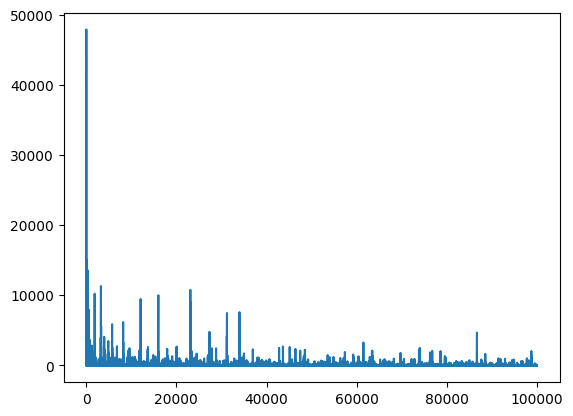

In [78]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Define the network and the loss function.
network = NeuralNetwork()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)


history = []
pbar = tqdm(range(100000), desc="Loss: --")
for epoch in pbar:
    x = torch.Tensor([random.random()+random.randint(-5,5)]);
    y = x**3 + x**2 - x - 1
    optimizer.zero_grad()
    output = network(x)#출력, 즉 예상값
    loss = loss_function(y,output)#손실함수로 손실 계산
    loss.backward()#손실을 미분해준다
    optimizer.step()#최적화함수를 이용해 네트워크의 레이어 파라미터가 학습된다.

    history.append(loss.item())
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

plt.plot(history)
plt.show()

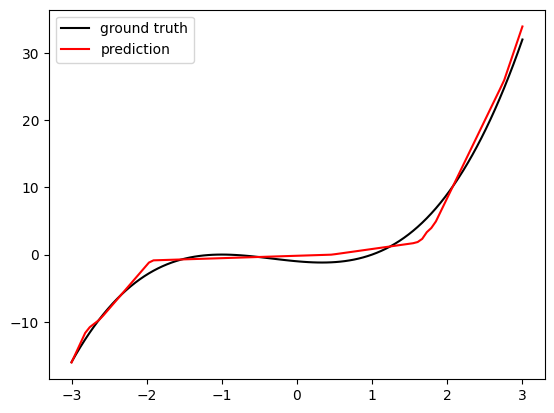

In [79]:
# plot the result
x_lim = 3
num_points = 100

x = torch.linspace(-x_lim, x_lim, num_points)
y = x**3 + x**2 - x - 1
plt.plot(x, y, label="ground truth", color="black")
plt.plot(x, network(x[:, None]).detach().numpy(), label="prediction", color="red")
plt.legend()
plt.show()

#MNIST 숫자 판별 AI (pytorch)

In [81]:
import torch#pytorch 기반
import torch.nn as nn
import torch.nn.functional as F
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()#MNIST 데이터셋 불러오기
x_train, x_test = x_train/255.0, x_test/255.0 #0~1 사이 값으로 표현

11490434/11490434 [==============================] - 0s 0us/step


In [103]:
print(y_train[1])

0


In [135]:
class NeuralNetwork(nn.Module):

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(28*28,1024)#데이터 하나는 28pixel * 28pixel
        self.activation = nn.ReLU()#활성화함수
        self.hidden_layer = nn.Linear(1024,256)#선형회귀
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(256,10)#출력층, 10개의 숫자에 대해 각각의 가능성을 출력한다

    def forward(self, x):
        x = x.view(-1,28*28)#x, 즉 입력을 펴준다
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        x = F.log_softmax(x, dim=1)#softMax함수를 통과시킨다
        return x


network = NeuralNetwork()
loss_function = nn.CrossEntropyLoss()#확률을 비교하는 손실함수를 사용한다

optimizer = torch.optim.SGD(network.parameters(), lr=0.01, momentum=0.5)#옵티마이저 설정한다

x = torch.Tensor([x_train[0]])#입력 데이터를 텐서로 전해준다
y = torch.Tensor([y_train[0]]).long()#정답 데이터이다. long형으로 변환해준다


optimizer.zero_grad()#초기화
output = network(x)#예측값 받는다
loss = loss_function(output, y)#손실 계산
loss.backward()#미분
optimizer.step()#학습

# Check parameters
parameters = network.input_layer.state_dict()
w = parameters['weight']
b = parameters['bias']
print(w)
print(b)

tensor([[ 0.0119, -0.0291, -0.0213,  ...,  0.0086,  0.0308,  0.0130],
        [-0.0254,  0.0040,  0.0235,  ...,  0.0061, -0.0020,  0.0122],
        [-0.0164, -0.0077, -0.0042,  ...,  0.0221,  0.0087, -0.0334],
        ...,
        [ 0.0079, -0.0111,  0.0213,  ...,  0.0193, -0.0076, -0.0112],
        [-0.0086, -0.0342,  0.0107,  ..., -0.0118,  0.0026, -0.0310],
        [-0.0080,  0.0224,  0.0091,  ...,  0.0165, -0.0034, -0.0024]])
tensor([ 0.0043,  0.0039,  0.0309,  ...,  0.0302,  0.0047, -0.0075])


Loss: 0.002: 100%|██████████| 30000/30000 [04:15<00:00, 117.36it/s]


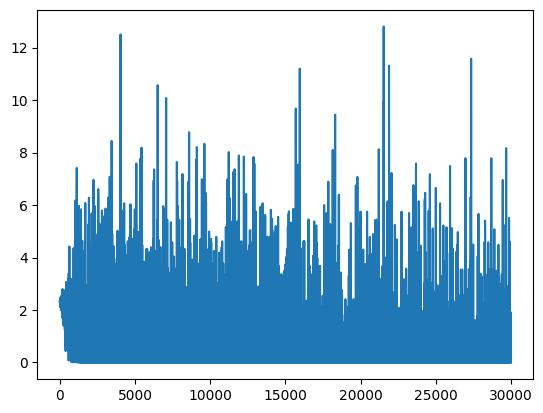

In [145]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

# Define the network and the loss function.
device = "cuda" if torch.cuda.is_available() else "cpu"
network = NeuralNetwork().to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(network.parameters(), lr=0.005, momentum=0.5)


history = []
pbar = tqdm(range(30000), desc="Loss: --")
for epoch in pbar:
    num = random.randint(0,len(x_train)-1)#훈련 데이터중 랜덤한 인덱스 선택
    x = torch.Tensor([x_train[num]])
    y = torch.Tensor([y_train[num]]).long()

    optimizer.zero_grad()
    output = network(x)
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()

    history.append(loss.item())
    if epoch % 100 == 0:
        pbar.set_description(f"Loss: {loss.item():.3f}")

plt.plot(history)#손실값 변화 출력. 수렴하지는 않는다
plt.show()

In [128]:
print(network(torch.Tensor(x_test[100])).argmax().item())#각각의 숫자에 대한 예상 확률중 가장 큰것 ->> 예상한 숫자

print(y_test[100])#정답 숫자

6
6


In [146]:
accuracy = 0
for i in range(0,len(x_test)):
  x = x_test[i];
  y = y_test[i]
  output = network(torch.Tensor(x_test[i])).argmax().item()
  if output == y:
    accuracy += 1

accuracy = accuracy / len(x_test) * 100 #정확도를 백분율로 계산해준다

print("accuracy : {0:0.4f}%".format(accuracy)) # 정확도 출력. 인간은 99.8%라고 한다

accuracy : 95.0400%
